In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_category_id.json
/kaggle/input/youtube-trend

In [2]:
# Load dataset
df=pd.read_csv("/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv")

In [3]:
# Display first few rows
print(df.head())

      video_id                                              title  \
0  s9FH4rDMvds     LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!   
1  jbGRowa5tIk                          ITZY “Not Shy” M/V TEASER   
2  3EfkCrXKZNs                      Oh Juliana PARÓDIA - MC Niack   
3  gBjox7vn3-g   Contos de Runeterra: Targon | A Estrada Tortuosa   
4  npoUGx7UW7o  Entrevista com Thammy Miranda | The Noite (10/...   

            publishedAt                 channelId  \
0  2020-08-11T22:21:49Z  UCGfBwrCoi9ZJjKiUK8MmJNw   
1  2020-08-11T15:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg   
2  2020-08-10T14:59:00Z  UCoXZmVma073v5G1cW82UKkA   
3  2020-08-11T15:00:09Z  UC6Xqz2pm50gDCORYztqhDpg   
4  2020-08-11T20:04:02Z  UCEWOoncsrmirqnFqxer9lmA   

                   channelTitle  categoryId         trending_date  \
0                 Pietro Guedes          22  2020-08-12T00:00:00Z   
1             JYP Entertainment          10  2020-08-12T00:00:00Z   
2                 As Irmãs Mota          22  2020-08-12T00:

In [4]:
# Basic info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268790 entries, 0 to 268789
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           268790 non-null  object
 1   title              268790 non-null  object
 2   publishedAt        268790 non-null  object
 3   channelId          268790 non-null  object
 4   channelTitle       268790 non-null  object
 5   categoryId         268790 non-null  int64 
 6   trending_date      268790 non-null  object
 7   tags               268790 non-null  object
 8   view_count         268790 non-null  int64 
 9   likes              268790 non-null  int64 
 10  dislikes           268790 non-null  int64 
 11  comment_count      268790 non-null  int64 
 12  thumbnail_link     268790 non-null  object
 13  comments_disabled  268790 non-null  bool  
 14  ratings_disabled   268790 non-null  bool  
 15  description        257252 non-null  object
dtypes: bool(2), int64(5)

In [5]:
# Check for missing values
print(df.isnull().sum())

video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             0
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description          11538
dtype: int64


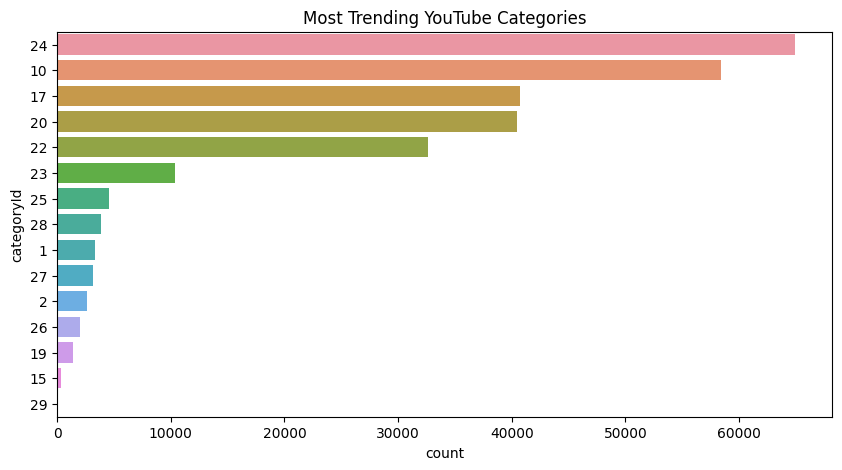

In [6]:
# Visualizing top trending categories
plt.figure(figsize=(10,5))
sn.countplot(y=df['categoryId'], order=df['categoryId'].value_counts().index)
plt.title('Most Trending YouTube Categories')
plt.show()

In [7]:
# Check the first few rows
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...


In [8]:
# Check dataset shape (rows, columns)
df.shape

(268790, 16)

In [9]:
# Column names
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [10]:
# Check data types
df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [11]:
# Drop duplicate rows if any
df=df.drop_duplicates()

In [12]:
# Fill missing values if necessary
df = df.copy()
df.fillna(0, inplace=True)


**Step 3: Data Visualization (Basic Insights)📌 Most trending video categories:**


**📌 Top 10 channels with most trending videos:**

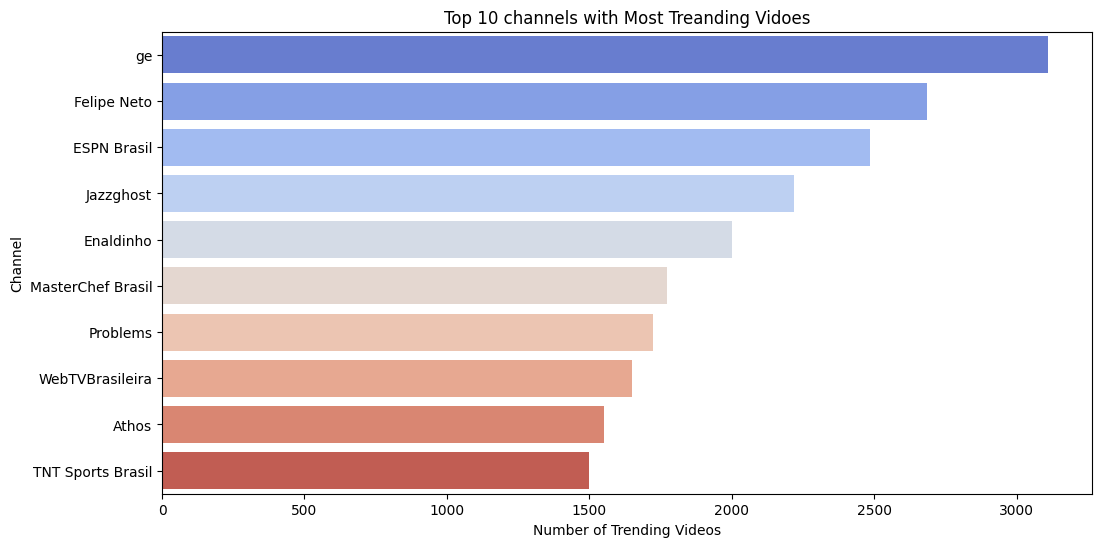

In [13]:
top_channels=df['channelTitle'].value_counts().head(10)
plt.figure(figsize=(12,6))
sn.barplot(y=top_channels.index, x=top_channels.values, palette="coolwarm")
plt.title("Top 10 channels with Most Treanding Vidoes")
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel")
plt.show()

**📌 Correlation Between Likes, Views, and Comments:**

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

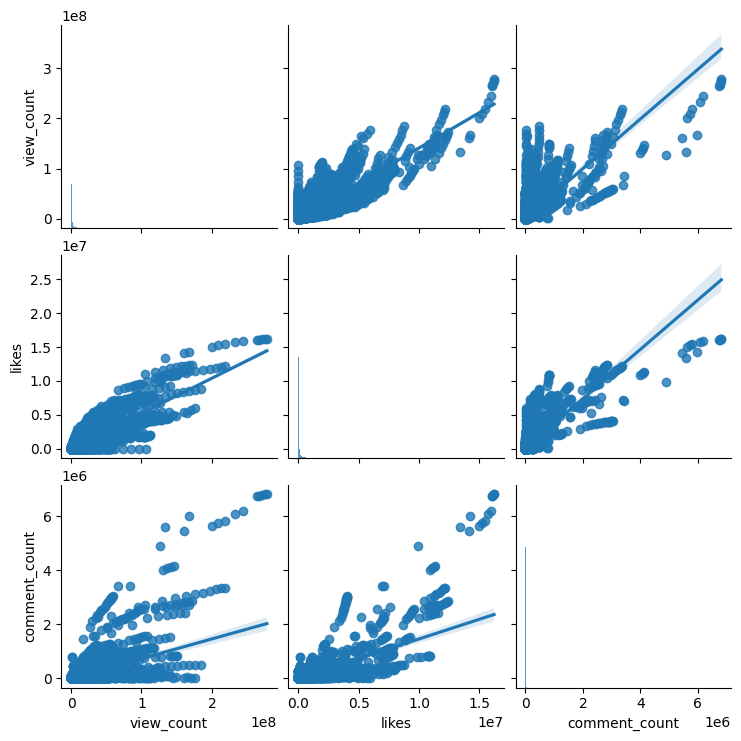

In [15]:
sn.pairplot(df[['view_count', 'likes', 'comment_count']], kind='reg')
plt.show()